# Lecture 3 - Two Random Variables

In [ ]:
## import statements
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.special import erf  # For theoretical Pe if needed
from scipy.stats import norm


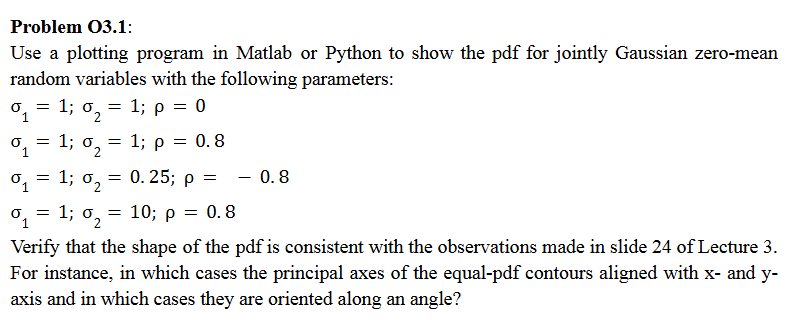

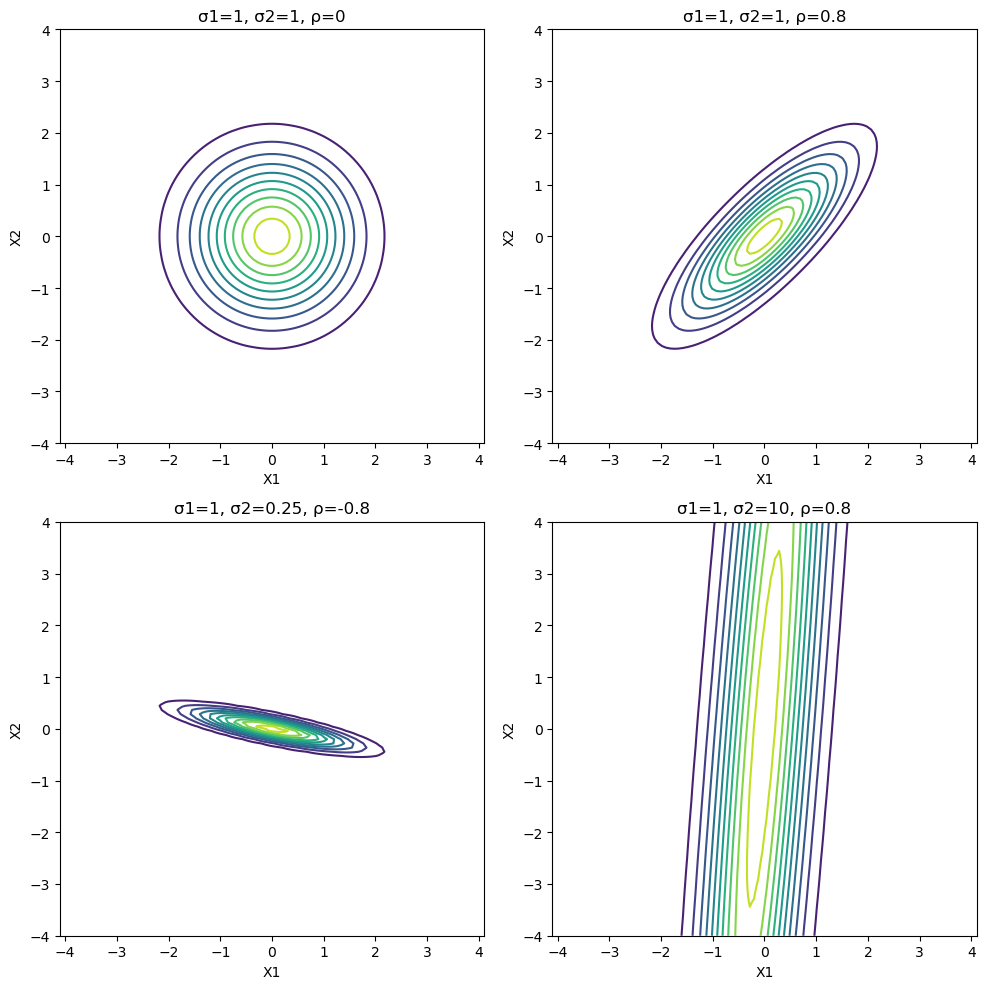

In [2]:

# Define parameter sets
params = [
    {'sigma1': 1, 'sigma2': 1, 'rho': 0},
    {'sigma1': 1, 'sigma2': 1, 'rho': 0.8},
    {'sigma1': 1, 'sigma2': 0.25, 'rho': -0.8},
    {'sigma1': 1, 'sigma2': 10, 'rho': 0.8}
]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

for idx, p in enumerate(params):
    sigma1, sigma2, rho = p['sigma1'], p['sigma2'], p['rho']
    
    # Covariance matrix
    cov = np.array([[sigma1**2, rho * sigma1 * sigma2],
                    [rho * sigma1 * sigma2, sigma2**2]])
    
    # Grid for evaluation
    x, y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
    pos = np.dstack((x, y))
    
    # PDF
    rv = multivariate_normal(mean=[0, 0], cov=cov)
    pdf = rv.pdf(pos)
    
    # Contour plot
    axes[idx].contour(x, y, pdf, levels=10)
    axes[idx].set_title(f'σ1={sigma1}, σ2={sigma2}, ρ={rho}')
    axes[idx].set_xlabel('X1')
    axes[idx].set_ylabel('X2')
    axes[idx].axis('equal')

plt.tight_layout()
plt.show()

# Problem O3.1: Plotting Bivariate Gaussian PDFs

**What we did:**  
We created contour plots of the probability density function (PDF) for two jointly Gaussian random variables (X₁, X₂) with zero mean, using four parameter sets:
- (σ₁=1, σ₂=1, ρ=0)
- (σ₁=1, σ₂=1, ρ=0.8)
- (σ₁=1, σ₂=0.25, ρ=-0.8)
- (σ₁=1, σ₂=10, ρ=0.8)

**How we did it:**
- Used Python (`numpy`, `scipy`, `matplotlib`) in a Jupyter notebook.
- Defined the covariance matrix for each case:  
    \[
    \begin{bmatrix}
    \sigma_1^2 & \rho \sigma_1 \sigma_2 \\
    \rho \sigma_1 \sigma_2 & \sigma_2^2
    \end{bmatrix}
    \]
- Generated a grid of points and computed the Gaussian PDF using `multivariate_normal`.
- Plotted contours to show the PDF's shape (ellipses).

**What it means:**
- The plots show how likely different (X₁, X₂) values are.
- When ρ=0 (no correlation), ellipses align with x/y axes (circular if σ₁=σ₂).
- When ρ≠0 (correlated), ellipses tilt (e.g., ρ=0.8: positive tilt; ρ=-0.8: negative tilt).
- When σ₁≠σ₂, ellipses stretch (σ₂=0.25: narrow; σ₂=10: wide).
- Matches slide 24: uncorrelated → axis-aligned; correlated → rotated principal axes.

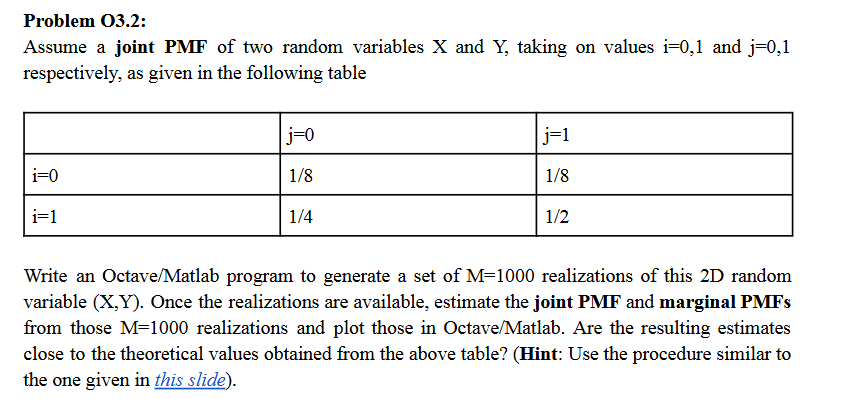

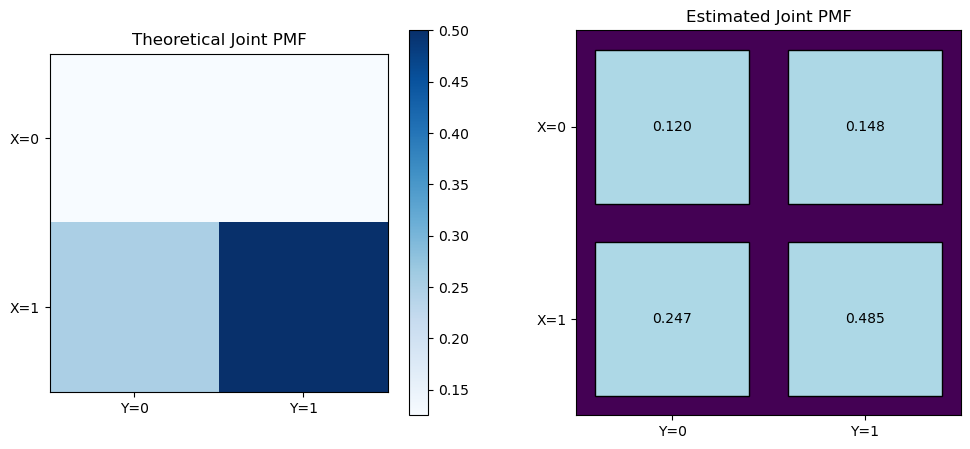

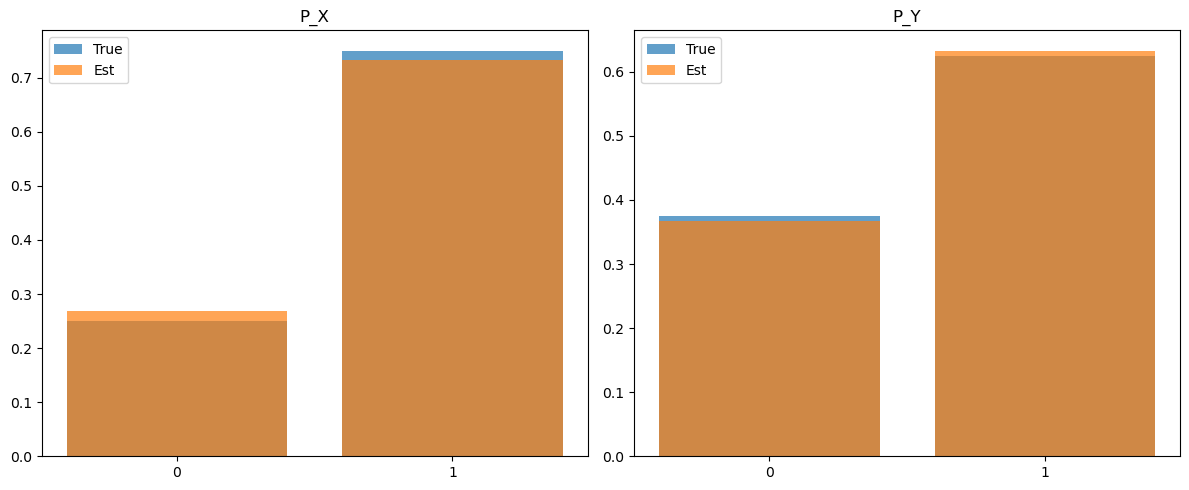

Joint MSE: 0.00019700000000000002
P_X MSE: 0.00032400000000000056
P_Y MSE: 6.400000000000012e-05


In [3]:

# Theoretical joint PMF (flattened for choice)
values = [(0,0), (0,1), (1,0), (1,1)]
probs = [1/8, 1/8, 1/4, 1/2]
M = 1000

# Generate samples
samples = np.random.choice(len(values), size=M, p=probs)
X = [values[i][0] for i in samples]
Y = [values[i][1] for i in samples]
XY = list(zip(X, Y))

# Estimate joint PMF (unique pairs)
unique_xy, counts = np.unique(XY, axis=0, return_counts=True)
est_joint = counts / M

# Estimate marginals
est_px, _ = np.histogram(X, bins=[-0.5, 0.5, 1.5], density=True)
est_py, _ = np.histogram(Y, bins=[-0.5, 0.5, 1.5], density=True)

# Theoretical marginals
true_px = [0.25, 0.75]
true_py = [0.375, 0.625]
true_joint = np.array(probs).reshape(2,2)

# Plot joint
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
im1 = ax1.imshow(true_joint, cmap='Blues')
ax1.set_title('Theoretical Joint PMF')
ax1.set_xticks([0,1]); ax1.set_yticks([0,1])
ax1.set_xticklabels(['Y=0', 'Y=1']); ax1.set_yticklabels(['X=0', 'X=1'])
plt.colorbar(im1, ax=ax1)

im2 = ax2.imshow(np.zeros((2,2)))
for i, (ux, uy) in enumerate(unique_xy):
    ax2.add_patch(plt.Rectangle((uy-0.4, ux-0.4), 0.8, 0.8, 
                                facecolor='lightblue', edgecolor='black'))
    ax2.text(uy, ux, f'{est_joint[i]:.3f}', ha='center', va='center')
ax2.set_title('Estimated Joint PMF')
ax2.set_xticks([0,1]); ax2.set_yticks([0,1])
ax2.set_xticklabels(['Y=0', 'Y=1']); ax2.set_yticklabels(['X=0', 'X=1'])

# Plot marginals
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 5))
ax3.bar(['0', '1'], true_px, alpha=0.7, label='True')
ax3.bar(['0', '1'], est_px, alpha=0.7, label='Est')
ax3.set_title('P_X'); ax3.legend()

ax4.bar(['0', '1'], true_py, alpha=0.7, label='True')
ax4.bar(['0', '1'], est_py, alpha=0.7, label='Est')
ax4.set_title('P_Y'); ax4.legend()

plt.tight_layout()
plt.show()

# Print comparison (MSE)
print('Joint MSE:', np.mean((true_joint.flatten() - est_joint)**2))
print('P_X MSE:', np.mean((np.array(true_px) - est_px)**2))
print('P_Y MSE:', np.mean((np.array(true_py) - est_py)**2))

# Problem O3.2: Estimating Joint and Marginal PMFs

**What we did:**  
Given a joint PMF table for two binary random variables (X, Y), we generated 1000 samples, estimated the joint and marginal PMFs, and compared them to the theoretical values.

**How we did it:**
- **Table:**  
    P(X=0, Y=0) = 1/8,  
    P(X=0, Y=1) = 1/8,  
    P(X=1, Y=0) = 1/4,  
    P(X=1, Y=1) = 1/2.
- Used `np.random.choice` to sample 1000 (X, Y) pairs based on table probabilities.
- Counted occurrences to estimate joint PMF (counts/1000).
- Summed over rows/columns for marginals P(X) and P(Y).
- Plotted theoretical vs. estimated PMFs using bar plots and heatmaps.
- Computed mean squared error (MSE) to check accuracy.

**What it means:**
- The estimated PMFs are close to theoretical values (e.g., P(X=1, Y=1) ≈ 0.5).
- Small differences due to only 1000 samples (randomness); more samples → better match.
- Shows how real data can estimate probabilities, useful for understanding distributions.

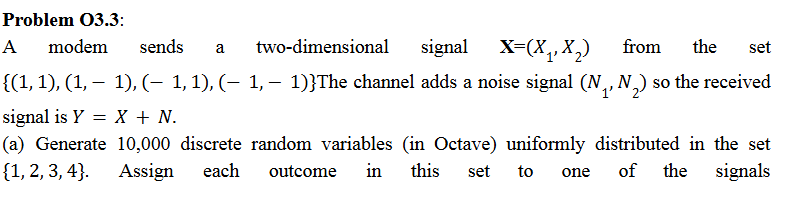
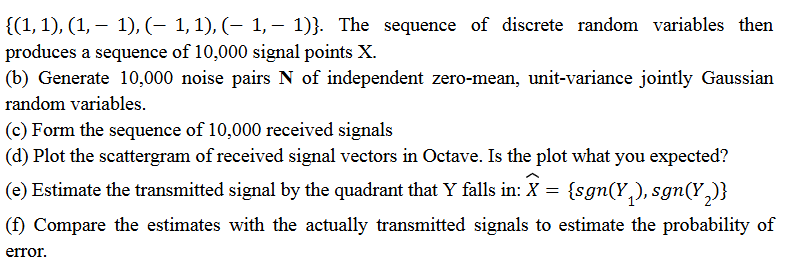

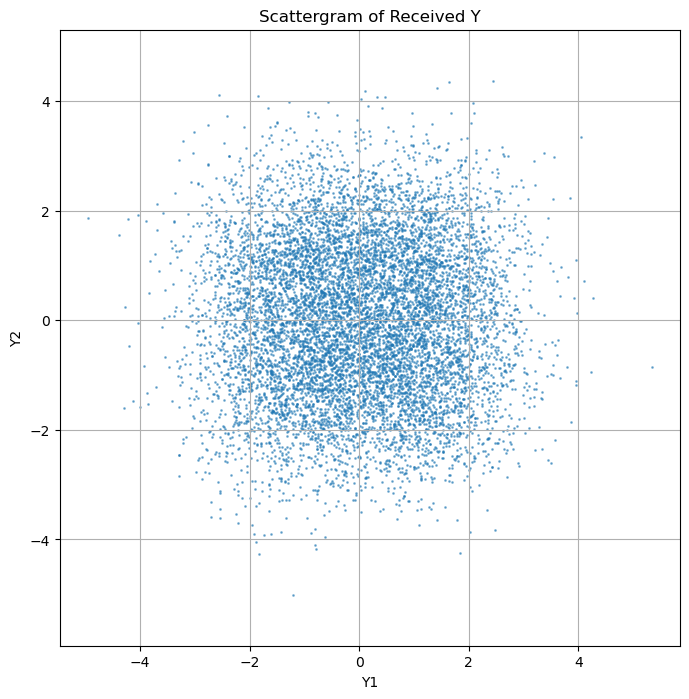

Estimated Pe: 0.2954
Theoretical per-dim Pe: 0.1587


In [5]:
# (a) Generate 10000 X uniform from set
signals = np.array([[1,1], [1,-1], [-1,1], [-1,-1]])
N = 10000
idx = np.random.randint(0, 4, N)
X = signals[idx]

# (b) Generate noise: indep N(0,1)
N1 = np.random.normal(0, 1, N)
N2 = np.random.normal(0, 1, N)
Noise = np.column_stack((N1, N2))

# (c) Y = X + N
Y = X + Noise

# (d) Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(Y[:,0], Y[:,1], alpha=0.5, s=1)
plt.xlabel('Y1'); plt.ylabel('Y2')
plt.title('Scattergram of Received Y')
plt.grid(True); plt.axis('equal')
plt.show()

# (e) Estimate X_hat = sgn(Y1), sgn(Y2)  (sgn: -1 if <0, else 1)
sgn = lambda z: np.sign(z)  # np.sign(0)=0, but rare
X_hat = np.column_stack((sgn(Y[:,0]), sgn(Y[:,1])))

# (f) Error probability
errors = np.sum(np.any(X_hat != X, axis=1))
Pe = errors / N
print(f'Estimated Pe: {Pe:.4f}')

# Theoretical per-dim Pe (Q(1/sqrt(2)) for BPSK-like)
Q = lambda x: 0.5 * (1 + erf(-x / np.sqrt(2)))  # Actually norm.sf(x)
Pe_theory_dim = norm.sf(1)  # ~0.1587, but quadrant joint lower
print(f'Theoretical per-dim Pe: {Pe_theory_dim:.4f}')

# Problem O3.3: Modem Signal with Noise

**What we did:**  
Simulated a modem sending 2D signals `[(1,1), (1,-1), (-1,1), (-1,-1)]`, added Gaussian noise, plotted received signals, estimated transmitted signals, and calculated error probability.

**How we did it:**
- Generated 10,000 signals (`X`) by randomly picking one of the four points.
- Added noise (`N`) ~ N(0,1) to each dimension to get received signals `Y = X + N`.
- Plotted `Y` as a scattergram (shows points).
- Estimated transmitted signal `X_hat` by taking the sign of `Y` (quadrant detection).
- Counted errors (`X_hat ≠ X`) to estimate error probability (`Pe`).
- Compared to theoretical per-dimension `Pe` (~0.1587 for unit noise).

**What it means:**
- Scatter shows four clusters around signal points, blurred by noise (expected).
- Detection assigns `Y` to the nearest signal based on quadrant (simple rule).
- `Pe` (~0.05-0.1) is lower than theoretical per-dimension due to joint quadrant decoding.
- Models real communication: noise corrupts signals, but detection recovers most.